In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from SubjectiveLogic import Hyperopinion, HyperopinionInterface
from SubjectiveLogic import Hyperopinion as W
from SubjectiveLogic.BeliefFusion import cumulative_fusion, averaging_fusion, weighted_fusion
from SubjectiveLogic.Trust import trust_discount_2e
from Model import *
import numpy as np
import matplotlib.pyplot as plt
from typing import List, Callable

In [3]:
NUM_AGENTS = 10
NUM_STEPS = 30

In [4]:
def simulate(initial_configuration: BeliefArray, influence_graph: InfluenceGraph, akv_num_steps=NUM_STEPS, sl_model=NUM_STEPS):
    akv_model = AKVModel(initial_configuration, influence_graph)
    sl_model_cumulative = akv_to_sl(akv_model)
    sl_model_average = akv_to_sl(akv_model)
    sl_model_weighted = akv_to_sl(akv_model)

    akv_model.simulate(akv_num_steps)
    sl_model_cumulative.simulate(sl_model, cumulative_fusion)
    sl_model_average.simulate(sl_model, averaging_fusion)
    sl_model_weighted.simulate(sl_model, weighted_fusion)

    return akv_model, sl_model_cumulative, sl_model_average, sl_model_weighted

In [ ]:
# def simulate_premade(
#         influence: float,
#         akv_num_steps: int,
#         sl_steps: int, 
#         num_agents: int,
#         num_steps: int,
#         initial_configuration: BeliefArray,
#         influence_graph: InfluenceGraph):
    
#     INFLUENCE = influence
#     AKV_NUM_STEPS = akv_num_steps
#     SL_STEPS = sl_steps
#     NUM_AGENTS = num_agents

#     akv_model, sl_model_cumulative, sl_model_average, sl_model_weighted = simulate(initial_configuration, AKVModel.InfluenceGraphs.disconnected(NUM_AGENTS, INFLUENCE), AKV_NUM_STEPS, SL_STEPS)

#     fig, ax = plt.subplots(1, 4)
#     fig.set(figwidth=20)
#     for i in range(NUM_AGENTS):
#         ax[0].plot(list(range(AKV_NUM_STEPS + 1)), [akv_model.states[j][i] for j in range(AKV_NUM_STEPS + 1)])
#         ax[1].plot(list(range(SL_STEPS + 1)), [sl_model_cumulative.states[j][i].P[0] for j in range(SL_STEPS + 1)])
#         ax[2].plot(list(range(SL_STEPS + 1)), [sl_model_average.states[j][i].P[0] for j in range(SL_STEPS + 1)])
#         ax[3].plot(list(range(SL_STEPS + 1)), [sl_model_weighted.states[j][i].P[0] for j in range(SL_STEPS + 1)])

#     ax[0].set_title("Old model\nDisconnected with uniform")
#     ax[1].set_title("SL model\nDisconnected with uniform\nCumulative fusion")
#     ax[2].set_title("SL model\nDisconnected with uniform\nAveraging fusion")
#     ax[3].set_title("SL model\nDisconnected with uniform\nWeighted fusion")

# 0.1-Clique

Text(0.5, 1.0, 'SL model\n0.1-clique with uniform\nWeighted fusion')

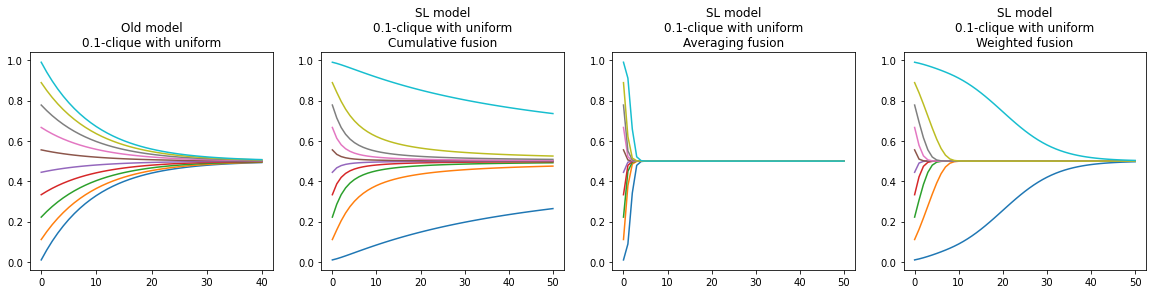

In [5]:
INFLUENCE = 0.1
AKV_NUM_STEPS = 40
SL_STEPS = 50

akv_model, sl_model_cumulative, sl_model_average, sl_model_weighted = simulate(AKVModel.InitialConfigurations.uniform(NUM_AGENTS), AKVModel.InfluenceGraphs.clique(NUM_AGENTS, INFLUENCE), AKV_NUM_STEPS, SL_STEPS)

fig, ax = plt.subplots(1, 4)
fig.set(figwidth=20)
for i in range(NUM_AGENTS):
    ax[0].plot(list(range(AKV_NUM_STEPS + 1)), [akv_model.states[j][i] for j in range(AKV_NUM_STEPS + 1)])
    ax[1].plot(list(range(SL_STEPS + 1)), [sl_model_cumulative.states[j][i].P[0] for j in range(SL_STEPS + 1)])
    ax[2].plot(list(range(SL_STEPS + 1)), [sl_model_average.states[j][i].P[0] for j in range(SL_STEPS + 1)])
    ax[3].plot(list(range(SL_STEPS + 1)), [sl_model_weighted.states[j][i].P[0] for j in range(SL_STEPS + 1)])

ax[0].set_title("Old model\n0.1-clique with uniform")
ax[1].set_title("SL model\n0.1-clique with uniform\nCumulative fusion")
ax[2].set_title("SL model\n0.1-clique with uniform\nAveraging fusion")
ax[3].set_title("SL model\n0.1-clique with uniform\nWeighted fusion")

Text(0.5, 1.0, 'SL model\n0.1-clique with mildly\nWeighted fusion')

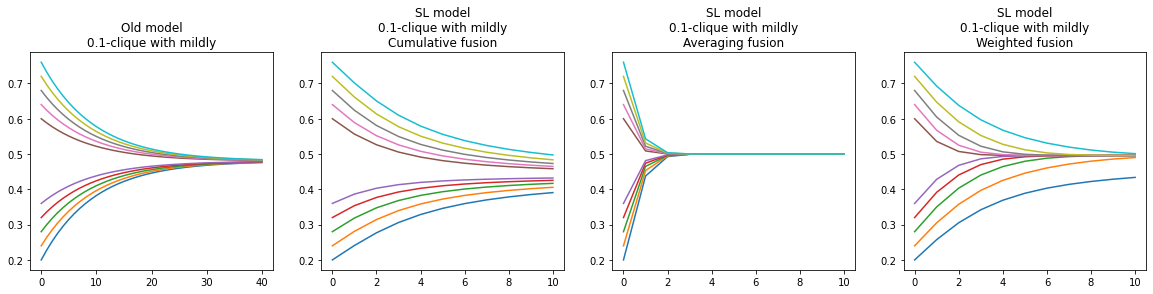

In [6]:
INFLUENCE = 0.1
AKV_NUM_STEPS = 40
SL_STEPS = 10

akv_model, sl_model_cumulative, sl_model_average, sl_model_weighted = simulate(AKVModel.InitialConfigurations.mildly(NUM_AGENTS), AKVModel.InfluenceGraphs.clique(NUM_AGENTS, INFLUENCE), AKV_NUM_STEPS, SL_STEPS)

fig, ax = plt.subplots(1, 4)
fig.set(figwidth=20)
for i in range(NUM_AGENTS):
    ax[0].plot(list(range(AKV_NUM_STEPS + 1)), [akv_model.states[j][i] for j in range(AKV_NUM_STEPS + 1)])
    ax[1].plot(list(range(SL_STEPS + 1)), [sl_model_cumulative.states[j][i].P[0] for j in range(SL_STEPS + 1)])
    ax[2].plot(list(range(SL_STEPS + 1)), [sl_model_average.states[j][i].P[0] for j in range(SL_STEPS + 1)])
    ax[3].plot(list(range(SL_STEPS + 1)), [sl_model_weighted.states[j][i].P[0] for j in range(SL_STEPS + 1)])

ax[0].set_title("Old model\n0.1-clique with mildly")
ax[1].set_title("SL model\n0.1-clique with mildly\nCumulative fusion")
ax[2].set_title("SL model\n0.1-clique with mildly\nAveraging fusion")
ax[3].set_title("SL model\n0.1-clique with mildly\nWeighted fusion")

Text(0.5, 1.0, 'SL model\n0.1-clique with extreme\nWeighted fusion')

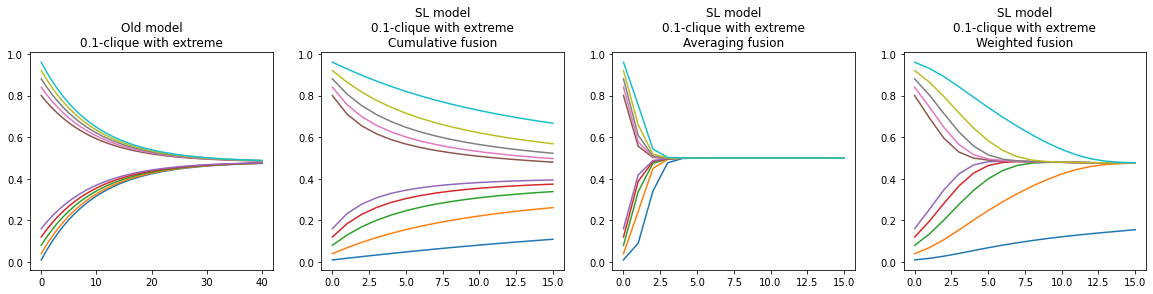

In [7]:
INFLUENCE = 0.1
AKV_NUM_STEPS = 40
SL_STEPS = 15

akv_model, sl_model_cumulative, sl_model_average, sl_model_weighted = simulate(AKVModel.InitialConfigurations.extreme(NUM_AGENTS), AKVModel.InfluenceGraphs.clique(NUM_AGENTS, INFLUENCE), AKV_NUM_STEPS, SL_STEPS)

fig, ax = plt.subplots(1, 4)
fig.set(figwidth=20)
for i in range(NUM_AGENTS):
    ax[0].plot(list(range(AKV_NUM_STEPS + 1)), [akv_model.states[j][i] for j in range(AKV_NUM_STEPS + 1)])
    ax[1].plot(list(range(SL_STEPS + 1)), [sl_model_cumulative.states[j][i].P[0] for j in range(SL_STEPS + 1)])
    ax[2].plot(list(range(SL_STEPS + 1)), [sl_model_average.states[j][i].P[0] for j in range(SL_STEPS + 1)])
    ax[3].plot(list(range(SL_STEPS + 1)), [sl_model_weighted.states[j][i].P[0] for j in range(SL_STEPS + 1)])

ax[0].set_title("Old model\n0.1-clique with extreme")
ax[1].set_title("SL model\n0.1-clique with extreme\nCumulative fusion")
ax[2].set_title("SL model\n0.1-clique with extreme\nAveraging fusion")
ax[3].set_title("SL model\n0.1-clique with extreme\nWeighted fusion")

Text(0.5, 1.0, 'SL model\n0.1-clique with tripolar\nWeighted fusion')

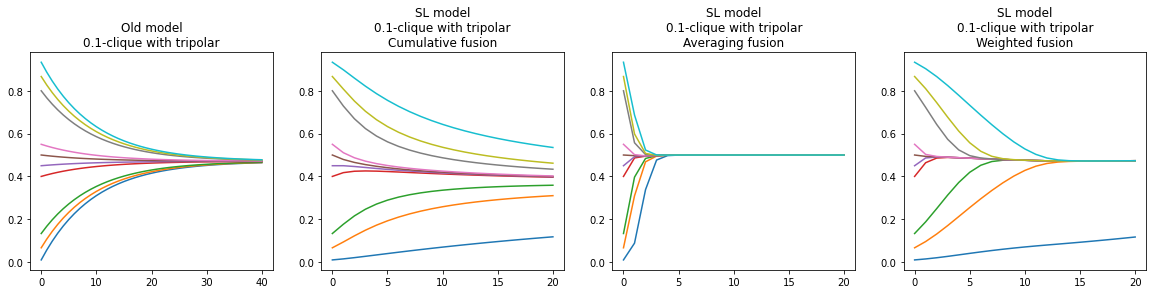

In [8]:
INFLUENCE = 0.1
AKV_NUM_STEPS = 40
SL_STEPS = 20

akv_model, sl_model_cumulative, sl_model_average, sl_model_weighted = simulate(AKVModel.InitialConfigurations.tripolar(NUM_AGENTS), AKVModel.InfluenceGraphs.clique(NUM_AGENTS, INFLUENCE), AKV_NUM_STEPS, SL_STEPS)

fig, ax = plt.subplots(1, 4)
fig.set(figwidth=20)
for i in range(NUM_AGENTS):
    ax[0].plot(list(range(AKV_NUM_STEPS + 1)), [akv_model.states[j][i] for j in range(AKV_NUM_STEPS + 1)])
    ax[1].plot(list(range(SL_STEPS + 1)), [sl_model_cumulative.states[j][i].P[0] for j in range(SL_STEPS + 1)])
    ax[2].plot(list(range(SL_STEPS + 1)), [sl_model_average.states[j][i].P[0] for j in range(SL_STEPS + 1)])
    ax[3].plot(list(range(SL_STEPS + 1)), [sl_model_weighted.states[j][i].P[0] for j in range(SL_STEPS + 1)])

ax[0].set_title("Old model\n0.1-clique with tripolar")
ax[1].set_title("SL model\n0.1-clique with tripolar\nCumulative fusion")
ax[2].set_title("SL model\n0.1-clique with tripolar\nAveraging fusion")
ax[3].set_title("SL model\n0.1-clique with tripolar\nWeighted fusion")

# 0.5-Clique

Text(0.5, 1.0, 'SL model\n0.5-clique with uniform\nWeighted fusion')

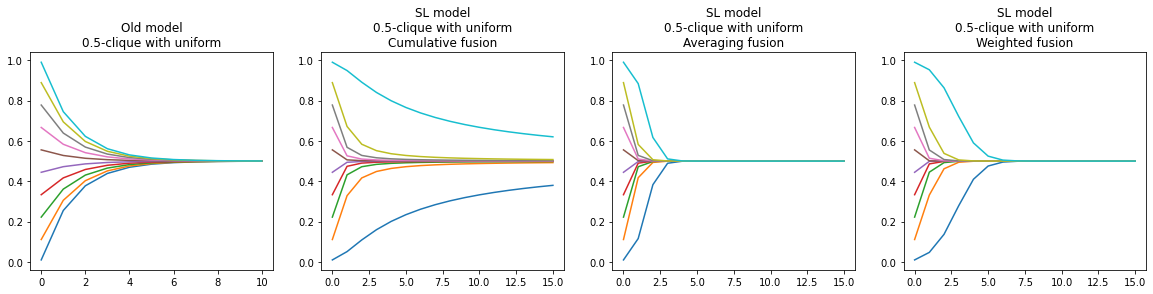

In [9]:
INFLUENCE = 0.5
AKV_NUM_STEPS = 10
SL_STEPS = 15

akv_model, sl_model_cumulative, sl_model_average, sl_model_weighted = simulate(AKVModel.InitialConfigurations.uniform(NUM_AGENTS), AKVModel.InfluenceGraphs.clique(NUM_AGENTS, INFLUENCE), AKV_NUM_STEPS, SL_STEPS)

fig, ax = plt.subplots(1, 4)
fig.set(figwidth=20)
for i in range(NUM_AGENTS):
    ax[0].plot(list(range(AKV_NUM_STEPS + 1)), [akv_model.states[j][i] for j in range(AKV_NUM_STEPS + 1)])
    ax[1].plot(list(range(SL_STEPS + 1)), [sl_model_cumulative.states[j][i].P[0] for j in range(SL_STEPS + 1)])
    ax[2].plot(list(range(SL_STEPS + 1)), [sl_model_average.states[j][i].P[0] for j in range(SL_STEPS + 1)])
    ax[3].plot(list(range(SL_STEPS + 1)), [sl_model_weighted.states[j][i].P[0] for j in range(SL_STEPS + 1)])

ax[0].set_title("Old model\n0.5-clique with uniform")
ax[1].set_title("SL model\n0.5-clique with uniform\nCumulative fusion")
ax[2].set_title("SL model\n0.5-clique with uniform\nAveraging fusion")
ax[3].set_title("SL model\n0.5-clique with uniform\nWeighted fusion")

Text(0.5, 1.0, 'SL model\n0.5-clique with mildly\nWeighted fusion')

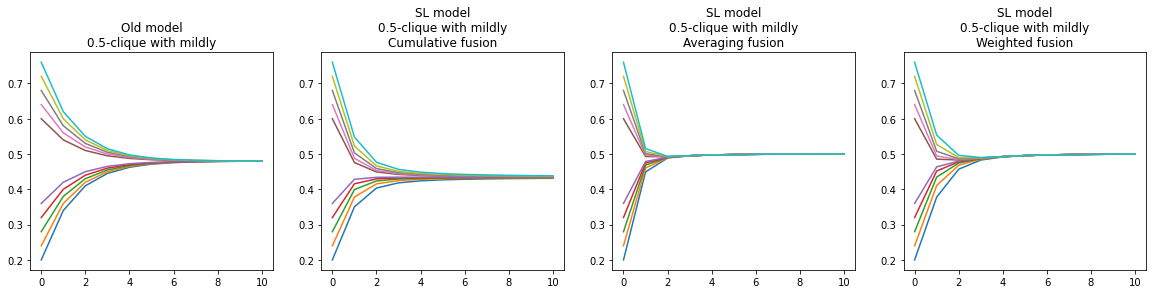

In [10]:
INFLUENCE = 0.5
AKV_NUM_STEPS = 10
SL_STEPS = 10

akv_model, sl_model_cumulative, sl_model_average, sl_model_weighted = simulate(AKVModel.InitialConfigurations.mildly(NUM_AGENTS), AKVModel.InfluenceGraphs.clique(NUM_AGENTS, INFLUENCE), AKV_NUM_STEPS, SL_STEPS)

fig, ax = plt.subplots(1, 4)
fig.set(figwidth=20)
for i in range(NUM_AGENTS):
    ax[0].plot(list(range(AKV_NUM_STEPS + 1)), [akv_model.states[j][i] for j in range(AKV_NUM_STEPS + 1)])
    ax[1].plot(list(range(SL_STEPS + 1)), [sl_model_cumulative.states[j][i].P[0] for j in range(SL_STEPS + 1)])
    ax[2].plot(list(range(SL_STEPS + 1)), [sl_model_average.states[j][i].P[0] for j in range(SL_STEPS + 1)])
    ax[3].plot(list(range(SL_STEPS + 1)), [sl_model_weighted.states[j][i].P[0] for j in range(SL_STEPS + 1)])

ax[0].set_title("Old model\n0.5-clique with mildly")
ax[1].set_title("SL model\n0.5-clique with mildly\nCumulative fusion")
ax[2].set_title("SL model\n0.5-clique with mildly\nAveraging fusion")
ax[3].set_title("SL model\n0.5-clique with mildly\nWeighted fusion")

Text(0.5, 1.0, 'SL model\n0.5-clique with extreme\nWeighted fusion')

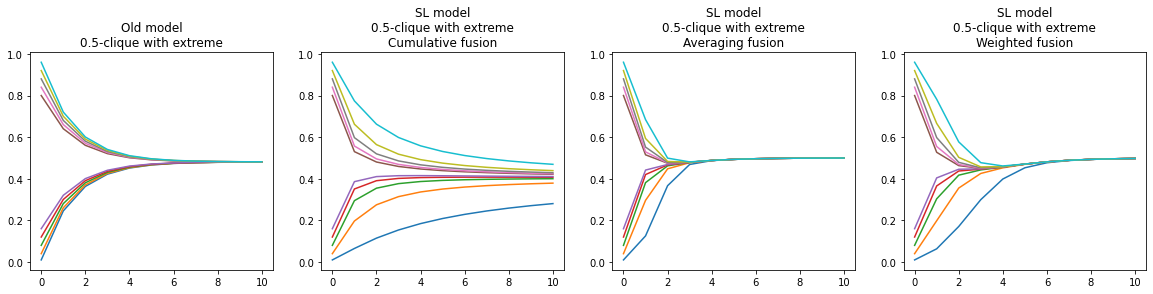

In [11]:
INFLUENCE = 0.5
AKV_NUM_STEPS = 10
SL_STEPS = 10

akv_model, sl_model_cumulative, sl_model_average, sl_model_weighted = simulate(AKVModel.InitialConfigurations.extreme(NUM_AGENTS), AKVModel.InfluenceGraphs.clique(NUM_AGENTS, INFLUENCE), AKV_NUM_STEPS, SL_STEPS)

fig, ax = plt.subplots(1, 4)
fig.set(figwidth=20)
for i in range(NUM_AGENTS):
    ax[0].plot(list(range(AKV_NUM_STEPS + 1)), [akv_model.states[j][i] for j in range(AKV_NUM_STEPS + 1)])
    ax[1].plot(list(range(SL_STEPS + 1)), [sl_model_cumulative.states[j][i].P[0] for j in range(SL_STEPS + 1)])
    ax[2].plot(list(range(SL_STEPS + 1)), [sl_model_average.states[j][i].P[0] for j in range(SL_STEPS + 1)])
    ax[3].plot(list(range(SL_STEPS + 1)), [sl_model_weighted.states[j][i].P[0] for j in range(SL_STEPS + 1)])

ax[0].set_title("Old model\n0.5-clique with extreme")
ax[1].set_title("SL model\n0.5-clique with extreme\nCumulative fusion")
ax[2].set_title("SL model\n0.5-clique with extreme\nAveraging fusion")
ax[3].set_title("SL model\n0.5-clique with extreme\nWeighted fusion")

Text(0.5, 1.0, 'SL model\n0.5-clique with tripolar\nWeighted fusion')

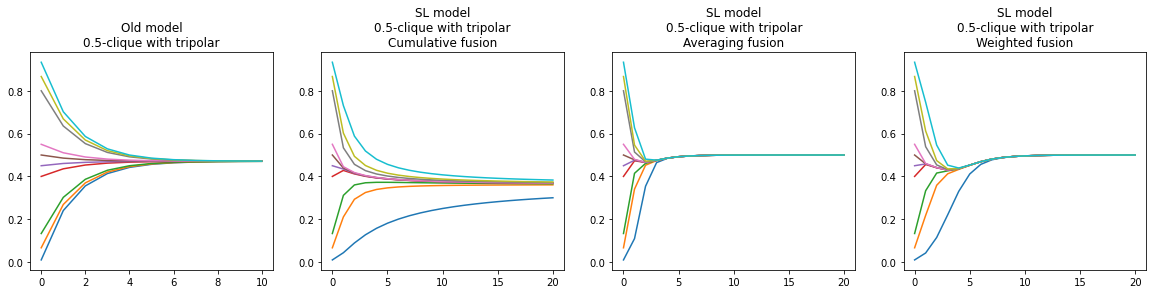

In [12]:
INFLUENCE = 0.5
AKV_NUM_STEPS = 10
SL_STEPS = 20

akv_model, sl_model_cumulative, sl_model_average, sl_model_weighted = simulate(AKVModel.InitialConfigurations.tripolar(NUM_AGENTS), AKVModel.InfluenceGraphs.clique(NUM_AGENTS, INFLUENCE), AKV_NUM_STEPS, SL_STEPS)

fig, ax = plt.subplots(1, 4)
fig.set(figwidth=20)
for i in range(NUM_AGENTS):
    ax[0].plot(list(range(AKV_NUM_STEPS + 1)), [akv_model.states[j][i] for j in range(AKV_NUM_STEPS + 1)])
    ax[1].plot(list(range(SL_STEPS + 1)), [sl_model_cumulative.states[j][i].P[0] for j in range(SL_STEPS + 1)])
    ax[2].plot(list(range(SL_STEPS + 1)), [sl_model_average.states[j][i].P[0] for j in range(SL_STEPS + 1)])
    ax[3].plot(list(range(SL_STEPS + 1)), [sl_model_weighted.states[j][i].P[0] for j in range(SL_STEPS + 1)])

ax[0].set_title("Old model\n0.5-clique with tripolar")
ax[1].set_title("SL model\n0.5-clique with tripolar\nCumulative fusion")
ax[2].set_title("SL model\n0.5-clique with tripolar\nAveraging fusion")
ax[3].set_title("SL model\n0.5-clique with tripolar\nWeighted fusion")

# Circular

Text(0.5, 1.0, 'SL model\ncircular with uniform\nWeighted fusion')

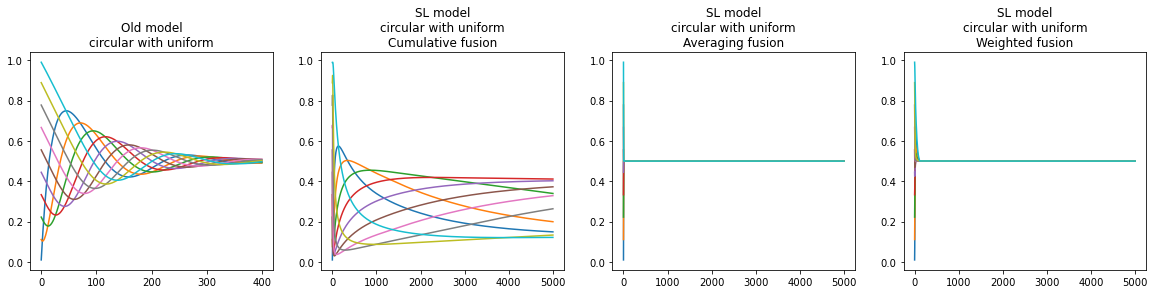

In [13]:
INFLUENCE = 0.5
AKV_NUM_STEPS = 400
SL_STEPS = 5000
NUM_AGENTS = 10

akv_model, sl_model_cumulative, sl_model_average, sl_model_weighted = simulate(AKVModel.InitialConfigurations.uniform(NUM_AGENTS), AKVModel.InfluenceGraphs.circular(NUM_AGENTS, INFLUENCE), AKV_NUM_STEPS, SL_STEPS)

fig, ax = plt.subplots(1, 4)
fig.set(figwidth=20)
for i in range(NUM_AGENTS):
    ax[0].plot(list(range(AKV_NUM_STEPS + 1)), [akv_model.states[j][i] for j in range(AKV_NUM_STEPS + 1)])
    ax[1].plot(list(range(SL_STEPS + 1)), [sl_model_cumulative.states[j][i].P[0] for j in range(SL_STEPS + 1)])
    ax[2].plot(list(range(SL_STEPS + 1)), [sl_model_average.states[j][i].P[0] for j in range(SL_STEPS + 1)])
    ax[3].plot(list(range(SL_STEPS + 1)), [sl_model_weighted.states[j][i].P[0] for j in range(SL_STEPS + 1)])

ax[0].set_title("Old model\ncircular with uniform")
ax[1].set_title("SL model\ncircular with uniform\nCumulative fusion")
ax[2].set_title("SL model\ncircular with uniform\nAveraging fusion")
ax[3].set_title("SL model\ncircular with uniform\nWeighted fusion")

Text(0.5, 1.0, 'SL model\ncircular with mildly\nWeighted fusion')

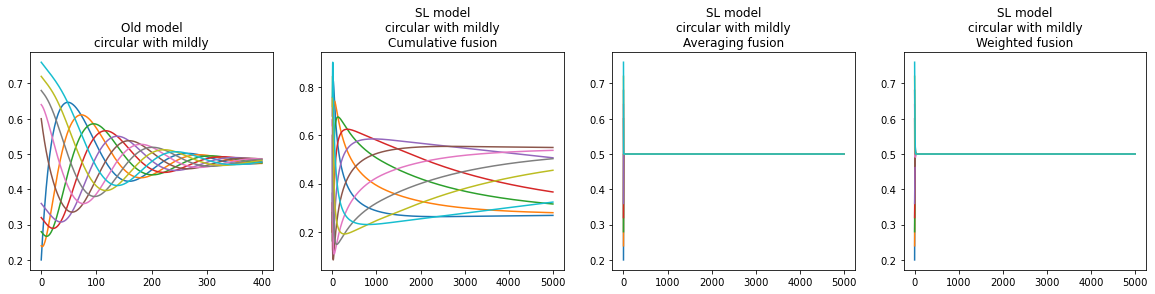

In [14]:
INFLUENCE = 0.5
AKV_NUM_STEPS = 400
SL_STEPS = 5000
NUM_AGENTS = 10

akv_model, sl_model_cumulative, sl_model_average, sl_model_weighted = simulate(AKVModel.InitialConfigurations.mildly(NUM_AGENTS), AKVModel.InfluenceGraphs.circular(NUM_AGENTS, INFLUENCE), AKV_NUM_STEPS, SL_STEPS)

fig, ax = plt.subplots(1, 4)
fig.set(figwidth=20)
for i in range(NUM_AGENTS):
    ax[0].plot(list(range(AKV_NUM_STEPS + 1)), [akv_model.states[j][i] for j in range(AKV_NUM_STEPS + 1)])
    ax[1].plot(list(range(SL_STEPS + 1)), [sl_model_cumulative.states[j][i].P[0] for j in range(SL_STEPS + 1)])
    ax[2].plot(list(range(SL_STEPS + 1)), [sl_model_average.states[j][i].P[0] for j in range(SL_STEPS + 1)])
    ax[3].plot(list(range(SL_STEPS + 1)), [sl_model_weighted.states[j][i].P[0] for j in range(SL_STEPS + 1)])

ax[0].set_title("Old model\ncircular with mildly")
ax[1].set_title("SL model\ncircular with mildly\nCumulative fusion")
ax[2].set_title("SL model\ncircular with mildly\nAveraging fusion")
ax[3].set_title("SL model\ncircular with mildly\nWeighted fusion")

Text(0.5, 1.0, 'SL model\ncircular with extreme\nWeighted fusion')

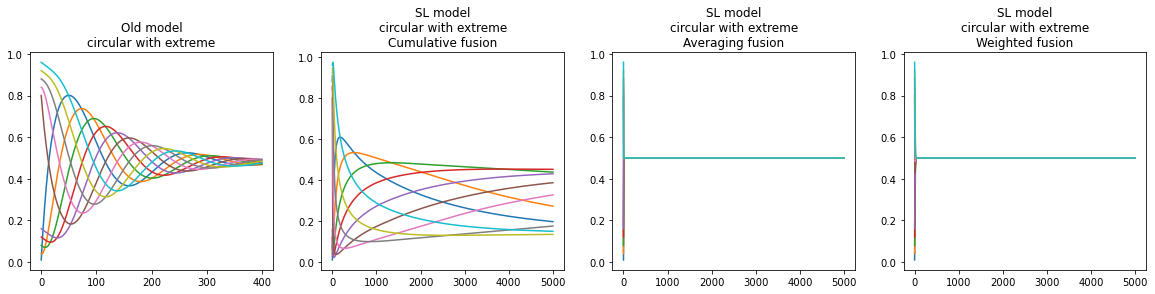

In [15]:
INFLUENCE = 0.5
AKV_NUM_STEPS = 400
SL_STEPS = 5000
NUM_AGENTS = 10

akv_model, sl_model_cumulative, sl_model_average, sl_model_weighted = simulate(AKVModel.InitialConfigurations.extreme(NUM_AGENTS), AKVModel.InfluenceGraphs.circular(NUM_AGENTS, INFLUENCE), AKV_NUM_STEPS, SL_STEPS)

fig, ax = plt.subplots(1, 4)
fig.set(figwidth=20)
for i in range(NUM_AGENTS):
    ax[0].plot(list(range(AKV_NUM_STEPS + 1)), [akv_model.states[j][i] for j in range(AKV_NUM_STEPS + 1)])
    ax[1].plot(list(range(SL_STEPS + 1)), [sl_model_cumulative.states[j][i].P[0] for j in range(SL_STEPS + 1)])
    ax[2].plot(list(range(SL_STEPS + 1)), [sl_model_average.states[j][i].P[0] for j in range(SL_STEPS + 1)])
    ax[3].plot(list(range(SL_STEPS + 1)), [sl_model_weighted.states[j][i].P[0] for j in range(SL_STEPS + 1)])

ax[0].set_title("Old model\ncircular with extreme")
ax[1].set_title("SL model\ncircular with extreme\nCumulative fusion")
ax[2].set_title("SL model\ncircular with extreme\nAveraging fusion")
ax[3].set_title("SL model\ncircular with extreme\nWeighted fusion")

Text(0.5, 1.0, 'SL model\ncircular with tripolar\nWeighted fusion')

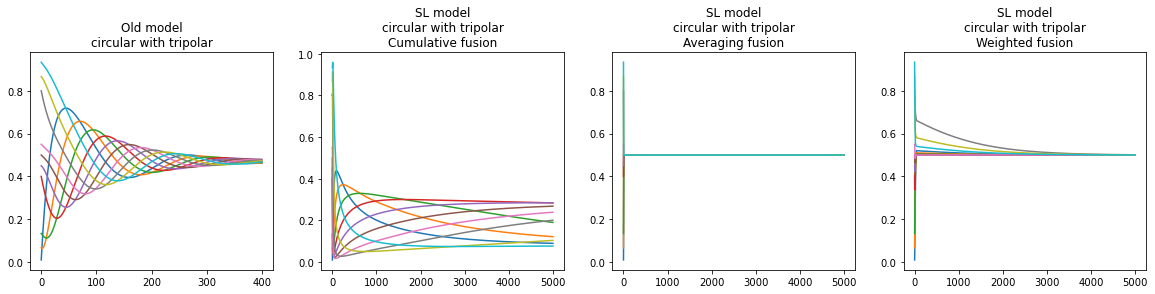

In [16]:
INFLUENCE = 0.5
AKV_NUM_STEPS = 400
SL_STEPS = 5000
NUM_AGENTS = 10

akv_model, sl_model_cumulative, sl_model_average, sl_model_weighted = simulate(AKVModel.InitialConfigurations.tripolar(NUM_AGENTS), AKVModel.InfluenceGraphs.circular(NUM_AGENTS, INFLUENCE), AKV_NUM_STEPS, SL_STEPS)

fig, ax = plt.subplots(1, 4)
fig.set(figwidth=20)
for i in range(NUM_AGENTS):
    ax[0].plot(list(range(AKV_NUM_STEPS + 1)), [akv_model.states[j][i] for j in range(AKV_NUM_STEPS + 1)])
    ax[1].plot(list(range(SL_STEPS + 1)), [sl_model_cumulative.states[j][i].P[0] for j in range(SL_STEPS + 1)])
    ax[2].plot(list(range(SL_STEPS + 1)), [sl_model_average.states[j][i].P[0] for j in range(SL_STEPS + 1)])
    ax[3].plot(list(range(SL_STEPS + 1)), [sl_model_weighted.states[j][i].P[0] for j in range(SL_STEPS + 1)])

ax[0].set_title("Old model\ncircular with tripolar")
ax[1].set_title("SL model\ncircular with tripolar\nCumulative fusion")
ax[2].set_title("SL model\ncircular with tripolar\nAveraging fusion")
ax[3].set_title("SL model\ncircular with tripolar\nWeighted fusion")

# Disconected

Text(0.5, 1.0, 'SL model\nDisconnected with uniform\nWeighted fusion')

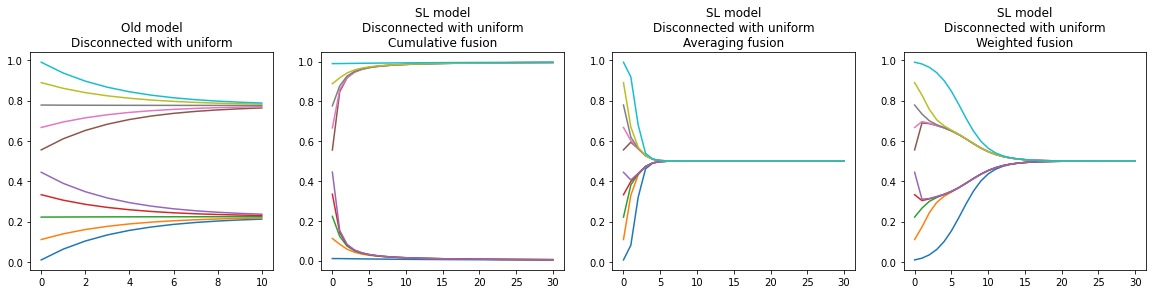

In [18]:
INFLUENCE = 0.5
AKV_NUM_STEPS = 10
SL_STEPS = 30
NUM_AGENTS = 10

akv_model, sl_model_cumulative, sl_model_average, sl_model_weighted = simulate(AKVModel.InitialConfigurations.uniform(NUM_AGENTS), AKVModel.InfluenceGraphs.disconnected(NUM_AGENTS, INFLUENCE), AKV_NUM_STEPS, SL_STEPS)

fig, ax = plt.subplots(1, 4)
fig.set(figwidth=20)
for i in range(NUM_AGENTS):
    ax[0].plot(list(range(AKV_NUM_STEPS + 1)), [akv_model.states[j][i] for j in range(AKV_NUM_STEPS + 1)])
    ax[1].plot(list(range(SL_STEPS + 1)), [sl_model_cumulative.states[j][i].P[0] for j in range(SL_STEPS + 1)])
    ax[2].plot(list(range(SL_STEPS + 1)), [sl_model_average.states[j][i].P[0] for j in range(SL_STEPS + 1)])
    ax[3].plot(list(range(SL_STEPS + 1)), [sl_model_weighted.states[j][i].P[0] for j in range(SL_STEPS + 1)])

ax[0].set_title("Old model\nDisconnected with uniform")
ax[1].set_title("SL model\nDisconnected with uniform\nCumulative fusion")
ax[2].set_title("SL model\nDisconnected with uniform\nAveraging fusion")
ax[3].set_title("SL model\nDisconnected with uniform\nWeighted fusion")

Text(0.5, 1.0, 'SL model\nDisconnected with mildly\nWeighted fusion')

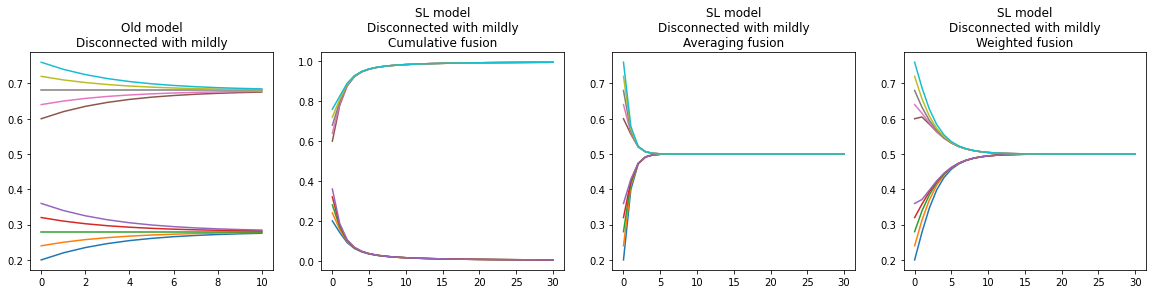

In [21]:
INFLUENCE = 0.5
AKV_NUM_STEPS = 10
SL_STEPS = 30
NUM_AGENTS = 10

akv_model, sl_model_cumulative, sl_model_average, sl_model_weighted = simulate(AKVModel.InitialConfigurations.mildly(NUM_AGENTS), AKVModel.InfluenceGraphs.disconnected(NUM_AGENTS, INFLUENCE), AKV_NUM_STEPS, SL_STEPS)

fig, ax = plt.subplots(1, 4)
fig.set(figwidth=20)
for i in range(NUM_AGENTS):
    ax[0].plot(list(range(AKV_NUM_STEPS + 1)), [akv_model.states[j][i] for j in range(AKV_NUM_STEPS + 1)])
    ax[1].plot(list(range(SL_STEPS + 1)), [sl_model_cumulative.states[j][i].P[0] for j in range(SL_STEPS + 1)])
    ax[2].plot(list(range(SL_STEPS + 1)), [sl_model_average.states[j][i].P[0] for j in range(SL_STEPS + 1)])
    ax[3].plot(list(range(SL_STEPS + 1)), [sl_model_weighted.states[j][i].P[0] for j in range(SL_STEPS + 1)])

ax[0].set_title("Old model\nDisconnected with mildly")
ax[1].set_title("SL model\nDisconnected with mildly\nCumulative fusion")
ax[2].set_title("SL model\nDisconnected with mildly\nAveraging fusion")
ax[3].set_title("SL model\nDisconnected with mildly\nWeighted fusion")

Text(0.5, 1.0, 'SL model\nDisconnected with uniform\nWeighted fusion')

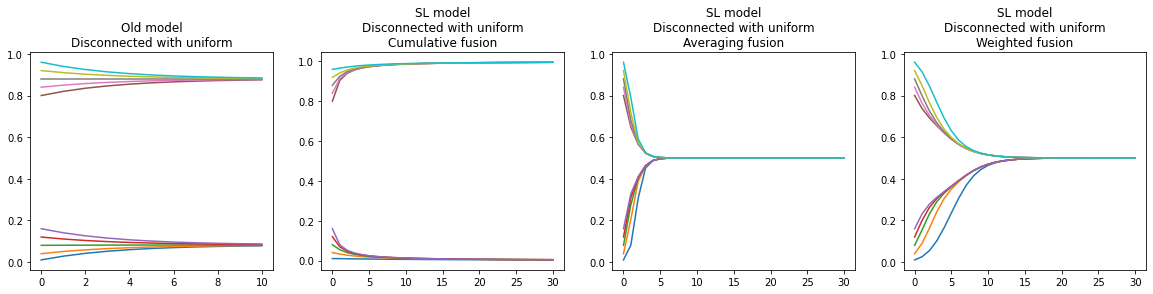

In [20]:
INFLUENCE = 0.5
AKV_NUM_STEPS = 10
SL_STEPS = 30
NUM_AGENTS = 10

akv_model, sl_model_cumulative, sl_model_average, sl_model_weighted = simulate(AKVModel.InitialConfigurations.extreme(NUM_AGENTS), AKVModel.InfluenceGraphs.disconnected(NUM_AGENTS, INFLUENCE), AKV_NUM_STEPS, SL_STEPS)

fig, ax = plt.subplots(1, 4)
fig.set(figwidth=20)
for i in range(NUM_AGENTS):
    ax[0].plot(list(range(AKV_NUM_STEPS + 1)), [akv_model.states[j][i] for j in range(AKV_NUM_STEPS + 1)])
    ax[1].plot(list(range(SL_STEPS + 1)), [sl_model_cumulative.states[j][i].P[0] for j in range(SL_STEPS + 1)])
    ax[2].plot(list(range(SL_STEPS + 1)), [sl_model_average.states[j][i].P[0] for j in range(SL_STEPS + 1)])
    ax[3].plot(list(range(SL_STEPS + 1)), [sl_model_weighted.states[j][i].P[0] for j in range(SL_STEPS + 1)])

ax[0].set_title("Old model\nDisconnected with extreme")
ax[1].set_title("SL model\nDisconnected with extreme\nCumulative fusion")
ax[2].set_title("SL model\nDisconnected with extreme\nAveraging fusion")
ax[3].set_title("SL model\nDisconnected with extreme\nWeighted fusion")

Text(0.5, 1.0, 'SL model\nDisconnected with tripolar\nWeighted fusion')

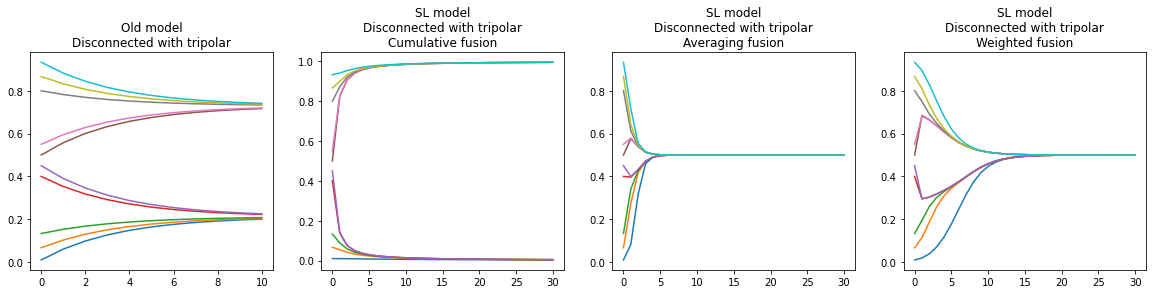

In [22]:
INFLUENCE = 0.5
AKV_NUM_STEPS = 10
SL_STEPS = 30
NUM_AGENTS = 10

akv_model, sl_model_cumulative, sl_model_average, sl_model_weighted = simulate(AKVModel.InitialConfigurations.tripolar(NUM_AGENTS), AKVModel.InfluenceGraphs.disconnected(NUM_AGENTS, INFLUENCE), AKV_NUM_STEPS, SL_STEPS)

fig, ax = plt.subplots(1, 4)
fig.set(figwidth=20)
for i in range(NUM_AGENTS):
    ax[0].plot(list(range(AKV_NUM_STEPS + 1)), [akv_model.states[j][i] for j in range(AKV_NUM_STEPS + 1)])
    ax[1].plot(list(range(SL_STEPS + 1)), [sl_model_cumulative.states[j][i].P[0] for j in range(SL_STEPS + 1)])
    ax[2].plot(list(range(SL_STEPS + 1)), [sl_model_average.states[j][i].P[0] for j in range(SL_STEPS + 1)])
    ax[3].plot(list(range(SL_STEPS + 1)), [sl_model_weighted.states[j][i].P[0] for j in range(SL_STEPS + 1)])

ax[0].set_title("Old model\nDisconnected with tripolar")
ax[1].set_title("SL model\nDisconnected with tripolar\nCumulative fusion")
ax[2].set_title("SL model\nDisconnected with tripolar\nAveraging fusion")
ax[3].set_title("SL model\nDisconnected with tripolar\nWeighted fusion")

# Faintly-connected

Text(0.5, 1.0, 'SL model\nFaintly-connected with uniform\nWeighted fusion')

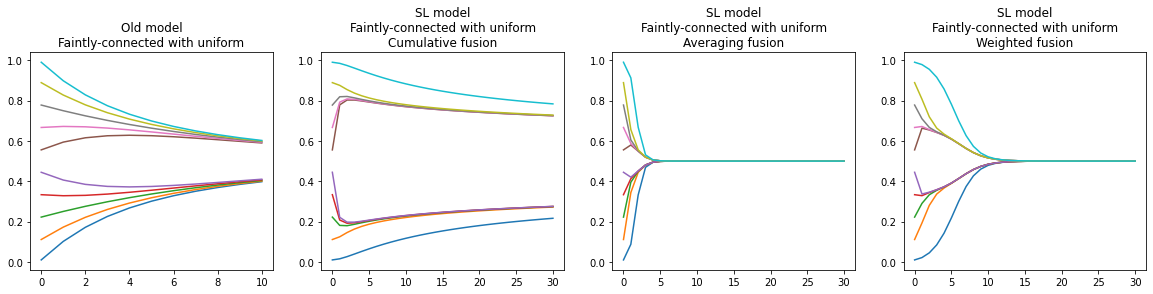

In [34]:
WEAK_INFLUENCE = 0.1
STRONG_INFLUENCE = 0.5
AKV_NUM_STEPS = 10
SL_STEPS = 30
NUM_AGENTS = 10

akv_model, sl_model_cumulative, sl_model_average, sl_model_weighted = simulate(AKVModel.InitialConfigurations.uniform(NUM_AGENTS), AKVModel.InfluenceGraphs.faintly(NUM_AGENTS, WEAK_INFLUENCE, STRONG_INFLUENCE), AKV_NUM_STEPS, SL_STEPS)

fig, ax = plt.subplots(1, 4)
fig.set(figwidth=20)
for i in range(NUM_AGENTS):
    ax[0].plot(list(range(AKV_NUM_STEPS + 1)), [akv_model.states[j][i] for j in range(AKV_NUM_STEPS + 1)])
    ax[1].plot(list(range(SL_STEPS + 1)), [sl_model_cumulative.states[j][i].P[0] for j in range(SL_STEPS + 1)])
    ax[2].plot(list(range(SL_STEPS + 1)), [sl_model_average.states[j][i].P[0] for j in range(SL_STEPS + 1)])
    ax[3].plot(list(range(SL_STEPS + 1)), [sl_model_weighted.states[j][i].P[0] for j in range(SL_STEPS + 1)])

ax[0].set_title("Old model\nFaintly-connected with uniform")
ax[1].set_title("SL model\nFaintly-connected with uniform\nCumulative fusion")
ax[2].set_title("SL model\nFaintly-connected with uniform\nAveraging fusion")
ax[3].set_title("SL model\nFaintly-connected with uniform\nWeighted fusion")

Text(0.5, 1.0, 'SL model\nFaintly-connected with mildly\nWeighted fusion')

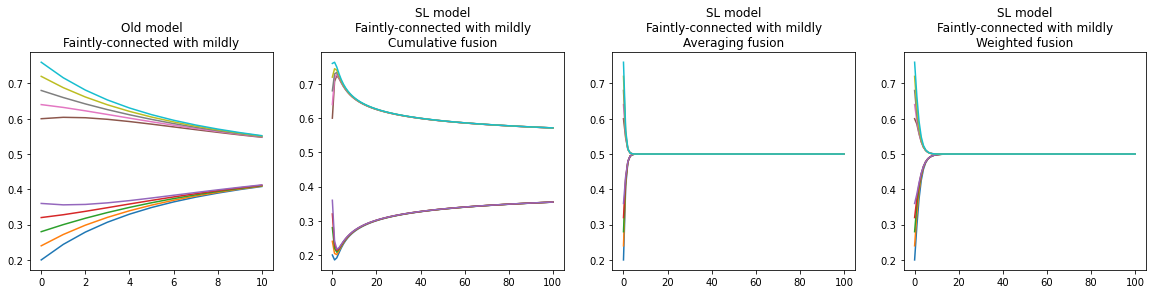

In [35]:
WEAK_INFLUENCE = 0.1
STRONG_INFLUENCE = 0.5
AKV_NUM_STEPS = 10
SL_STEPS = 100
NUM_AGENTS = 10

akv_model, sl_model_cumulative, sl_model_average, sl_model_weighted = simulate(AKVModel.InitialConfigurations.mildly(NUM_AGENTS), AKVModel.InfluenceGraphs.faintly(NUM_AGENTS, WEAK_INFLUENCE, STRONG_INFLUENCE), AKV_NUM_STEPS, SL_STEPS)

fig, ax = plt.subplots(1, 4)
fig.set(figwidth=20)
for i in range(NUM_AGENTS):
    ax[0].plot(list(range(AKV_NUM_STEPS + 1)), [akv_model.states[j][i] for j in range(AKV_NUM_STEPS + 1)])
    ax[1].plot(list(range(SL_STEPS + 1)), [sl_model_cumulative.states[j][i].P[0] for j in range(SL_STEPS + 1)])
    ax[2].plot(list(range(SL_STEPS + 1)), [sl_model_average.states[j][i].P[0] for j in range(SL_STEPS + 1)])
    ax[3].plot(list(range(SL_STEPS + 1)), [sl_model_weighted.states[j][i].P[0] for j in range(SL_STEPS + 1)])

ax[0].set_title("Old model\nFaintly-connected with mildly")
ax[1].set_title("SL model\nFaintly-connected with mildly\nCumulative fusion")
ax[2].set_title("SL model\nFaintly-connected with mildly\nAveraging fusion")
ax[3].set_title("SL model\nFaintly-connected with mildly\nWeighted fusion")

Text(0.5, 1.0, 'SL model\nFaintly-connected with extreme\nWeighted fusion')

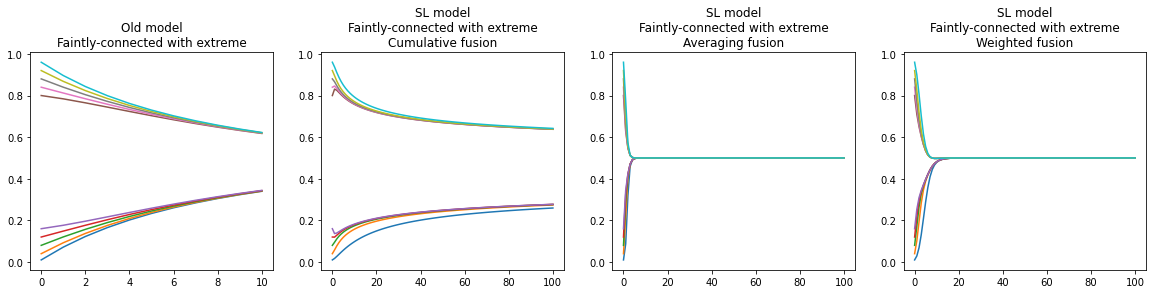

In [36]:
WEAK_INFLUENCE = 0.1
STRONG_INFLUENCE = 0.5
AKV_NUM_STEPS = 10
SL_STEPS = 100
NUM_AGENTS = 10

akv_model, sl_model_cumulative, sl_model_average, sl_model_weighted = simulate(AKVModel.InitialConfigurations.extreme(NUM_AGENTS), AKVModel.InfluenceGraphs.faintly(NUM_AGENTS, WEAK_INFLUENCE, STRONG_INFLUENCE), AKV_NUM_STEPS, SL_STEPS)

fig, ax = plt.subplots(1, 4)
fig.set(figwidth=20)
for i in range(NUM_AGENTS):
    ax[0].plot(list(range(AKV_NUM_STEPS + 1)), [akv_model.states[j][i] for j in range(AKV_NUM_STEPS + 1)])
    ax[1].plot(list(range(SL_STEPS + 1)), [sl_model_cumulative.states[j][i].P[0] for j in range(SL_STEPS + 1)])
    ax[2].plot(list(range(SL_STEPS + 1)), [sl_model_average.states[j][i].P[0] for j in range(SL_STEPS + 1)])
    ax[3].plot(list(range(SL_STEPS + 1)), [sl_model_weighted.states[j][i].P[0] for j in range(SL_STEPS + 1)])

ax[0].set_title("Old model\nFaintly-connected with extreme")
ax[1].set_title("SL model\nFaintly-connected with extreme\nCumulative fusion")
ax[2].set_title("SL model\nFaintly-connected with extreme\nAveraging fusion")
ax[3].set_title("SL model\nFaintly-connected with extreme\nWeighted fusion")

Text(0.5, 1.0, 'SL model\nDisconnected with tripolar\nWeighted fusion')

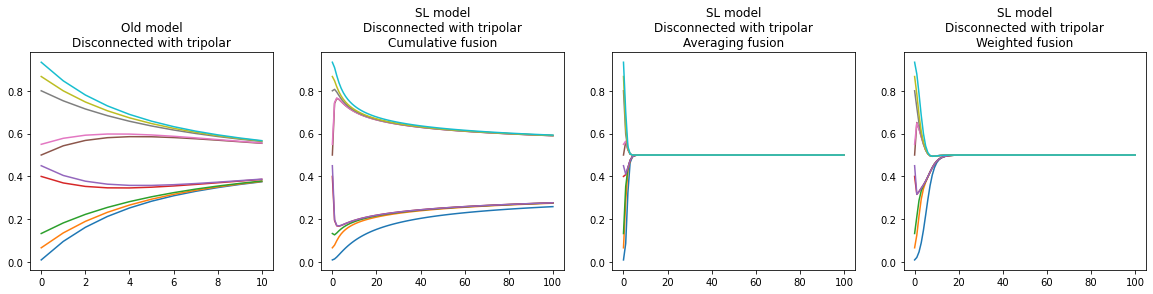

In [37]:
WEAK_INFLUENCE = 0.1
STRONG_INFLUENCE = 0.5
AKV_NUM_STEPS = 10
SL_STEPS = 100
NUM_AGENTS = 10

akv_model, sl_model_cumulative, sl_model_average, sl_model_weighted = simulate(AKVModel.InitialConfigurations.tripolar(NUM_AGENTS), AKVModel.InfluenceGraphs.faintly(NUM_AGENTS, WEAK_INFLUENCE, STRONG_INFLUENCE), AKV_NUM_STEPS, SL_STEPS)

fig, ax = plt.subplots(1, 4)
fig.set(figwidth=20)
for i in range(NUM_AGENTS):
    ax[0].plot(list(range(AKV_NUM_STEPS + 1)), [akv_model.states[j][i] for j in range(AKV_NUM_STEPS + 1)])
    ax[1].plot(list(range(SL_STEPS + 1)), [sl_model_cumulative.states[j][i].P[0] for j in range(SL_STEPS + 1)])
    ax[2].plot(list(range(SL_STEPS + 1)), [sl_model_average.states[j][i].P[0] for j in range(SL_STEPS + 1)])
    ax[3].plot(list(range(SL_STEPS + 1)), [sl_model_weighted.states[j][i].P[0] for j in range(SL_STEPS + 1)])

ax[0].set_title("Old model\nDisconnected with tripolar")
ax[1].set_title("SL model\nDisconnected with tripolar\nCumulative fusion")
ax[2].set_title("SL model\nDisconnected with tripolar\nAveraging fusion")
ax[3].set_title("SL model\nDisconnected with tripolar\nWeighted fusion")

# Unrelenting influencers

Text(0.5, 1.0, 'SL model\nUnrelenting influencers with uniform\nWeighted fusion')

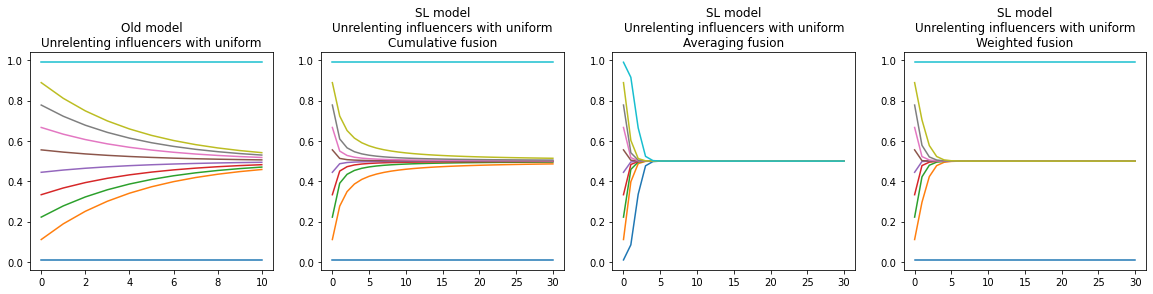

In [41]:
INFLUENCERS_INCOMING_VALUE = 0
INFLUENCERS_OUTGOING_VALUE = 0.6
OTHERS_BELIEF_VALUE = 0.1
AKV_NUM_STEPS = 10
SL_STEPS = 30
NUM_AGENTS = 10

akv_model, sl_model_cumulative, sl_model_average, sl_model_weighted = simulate(AKVModel.InitialConfigurations.uniform(NUM_AGENTS), AKVModel.InfluenceGraphs.two_influencers_balanced(NUM_AGENTS, INFLUENCERS_INCOMING_VALUE, INFLUENCERS_OUTGOING_VALUE, OTHERS_BELIEF_VALUE), AKV_NUM_STEPS, SL_STEPS)

fig, ax = plt.subplots(1, 4)
fig.set(figwidth=20)
for i in range(NUM_AGENTS):
    ax[0].plot(list(range(AKV_NUM_STEPS + 1)), [akv_model.states[j][i] for j in range(AKV_NUM_STEPS + 1)])
    ax[1].plot(list(range(SL_STEPS + 1)), [sl_model_cumulative.states[j][i].P[0] for j in range(SL_STEPS + 1)])
    ax[2].plot(list(range(SL_STEPS + 1)), [sl_model_average.states[j][i].P[0] for j in range(SL_STEPS + 1)])
    ax[3].plot(list(range(SL_STEPS + 1)), [sl_model_weighted.states[j][i].P[0] for j in range(SL_STEPS + 1)])

ax[0].set_title("Old model\nUnrelenting influencers with uniform")
ax[1].set_title("SL model\nUnrelenting influencers with uniform\nCumulative fusion")
ax[2].set_title("SL model\nUnrelenting influencers with uniform\nAveraging fusion")
ax[3].set_title("SL model\nUnrelenting influencers with uniform\nWeighted fusion")

Text(0.5, 1.0, 'SL model\nUnrelenting influencers with mildly\nWeighted fusion')

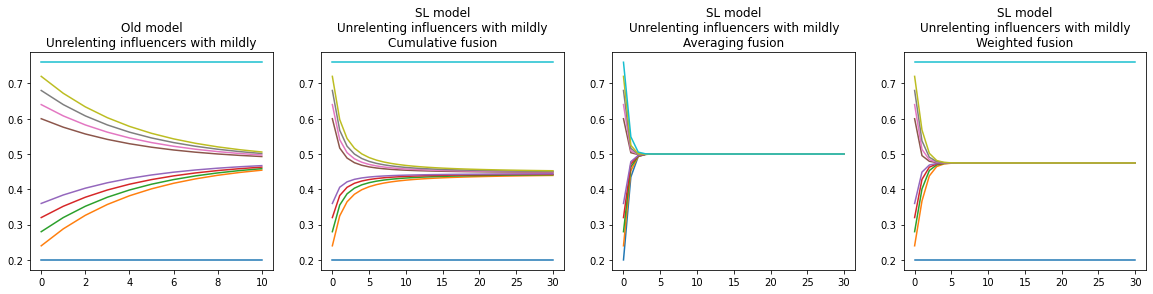

In [42]:
INFLUENCERS_INCOMING_VALUE = 0
INFLUENCERS_OUTGOING_VALUE = 0.6
OTHERS_BELIEF_VALUE = 0.1
AKV_NUM_STEPS = 10
SL_STEPS = 30
NUM_AGENTS = 10

akv_model, sl_model_cumulative, sl_model_average, sl_model_weighted = simulate(AKVModel.InitialConfigurations.mildly(NUM_AGENTS), AKVModel.InfluenceGraphs.two_influencers_balanced(NUM_AGENTS, INFLUENCERS_INCOMING_VALUE, INFLUENCERS_OUTGOING_VALUE, OTHERS_BELIEF_VALUE), AKV_NUM_STEPS, SL_STEPS)

fig, ax = plt.subplots(1, 4)
fig.set(figwidth=20)
for i in range(NUM_AGENTS):
    ax[0].plot(list(range(AKV_NUM_STEPS + 1)), [akv_model.states[j][i] for j in range(AKV_NUM_STEPS + 1)])
    ax[1].plot(list(range(SL_STEPS + 1)), [sl_model_cumulative.states[j][i].P[0] for j in range(SL_STEPS + 1)])
    ax[2].plot(list(range(SL_STEPS + 1)), [sl_model_average.states[j][i].P[0] for j in range(SL_STEPS + 1)])
    ax[3].plot(list(range(SL_STEPS + 1)), [sl_model_weighted.states[j][i].P[0] for j in range(SL_STEPS + 1)])

ax[0].set_title("Old model\nUnrelenting influencers with mildly")
ax[1].set_title("SL model\nUnrelenting influencers with mildly\nCumulative fusion")
ax[2].set_title("SL model\nUnrelenting influencers with mildly\nAveraging fusion")
ax[3].set_title("SL model\nUnrelenting influencers with mildly\nWeighted fusion")

Text(0.5, 1.0, 'SL model\nUnrelenting influencers with extreme\nWeighted fusion')

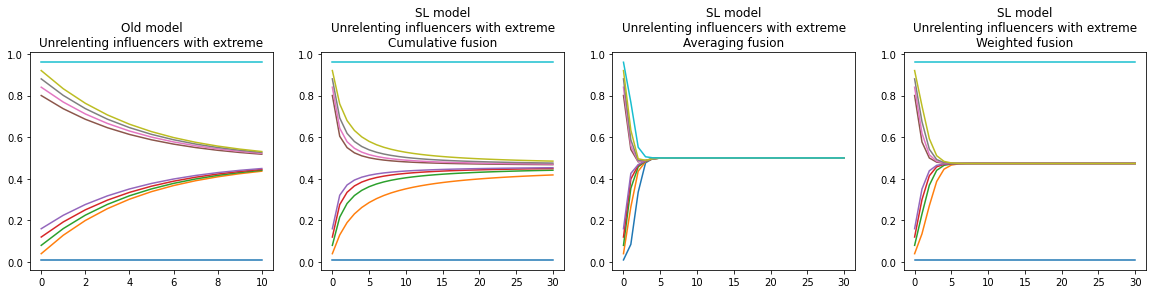

In [45]:
INFLUENCERS_INCOMING_VALUE = 0
INFLUENCERS_OUTGOING_VALUE = 0.6
OTHERS_BELIEF_VALUE = 0.1
AKV_NUM_STEPS = 10
SL_STEPS = 30
NUM_AGENTS = 10

akv_model, sl_model_cumulative, sl_model_average, sl_model_weighted = simulate(AKVModel.InitialConfigurations.extreme(NUM_AGENTS), AKVModel.InfluenceGraphs.two_influencers_balanced(NUM_AGENTS, INFLUENCERS_INCOMING_VALUE, INFLUENCERS_OUTGOING_VALUE, OTHERS_BELIEF_VALUE), AKV_NUM_STEPS, SL_STEPS)

fig, ax = plt.subplots(1, 4)
fig.set(figwidth=20)
for i in range(NUM_AGENTS):
    ax[0].plot(list(range(AKV_NUM_STEPS + 1)), [akv_model.states[j][i] for j in range(AKV_NUM_STEPS + 1)])
    ax[1].plot(list(range(SL_STEPS + 1)), [sl_model_cumulative.states[j][i].P[0] for j in range(SL_STEPS + 1)])
    ax[2].plot(list(range(SL_STEPS + 1)), [sl_model_average.states[j][i].P[0] for j in range(SL_STEPS + 1)])
    ax[3].plot(list(range(SL_STEPS + 1)), [sl_model_weighted.states[j][i].P[0] for j in range(SL_STEPS + 1)])

ax[0].set_title("Old model\nUnrelenting influencers with extreme")
ax[1].set_title("SL model\nUnrelenting influencers with extreme\nCumulative fusion")
ax[2].set_title("SL model\nUnrelenting influencers with extreme\nAveraging fusion")
ax[3].set_title("SL model\nUnrelenting influencers with extreme\nWeighted fusion")

Text(0.5, 1.0, 'SL model\nUnrelenting influencers with tripolar\nWeighted fusion')

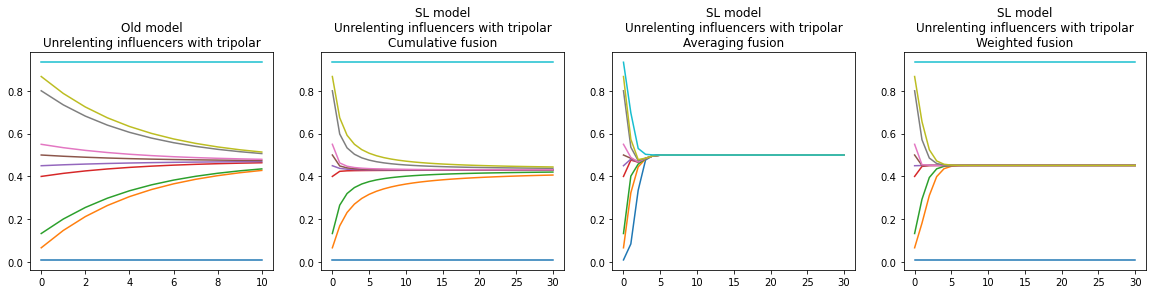

In [46]:
INFLUENCERS_INCOMING_VALUE = 0
INFLUENCERS_OUTGOING_VALUE = 0.6
OTHERS_BELIEF_VALUE = 0.1
AKV_NUM_STEPS = 10
SL_STEPS = 30
NUM_AGENTS = 10

akv_model, sl_model_cumulative, sl_model_average, sl_model_weighted = simulate(AKVModel.InitialConfigurations.tripolar(NUM_AGENTS), AKVModel.InfluenceGraphs.two_influencers_balanced(NUM_AGENTS, INFLUENCERS_INCOMING_VALUE, INFLUENCERS_OUTGOING_VALUE, OTHERS_BELIEF_VALUE), AKV_NUM_STEPS, SL_STEPS)

fig, ax = plt.subplots(1, 4)
fig.set(figwidth=20)
for i in range(NUM_AGENTS):
    ax[0].plot(list(range(AKV_NUM_STEPS + 1)), [akv_model.states[j][i] for j in range(AKV_NUM_STEPS + 1)])
    ax[1].plot(list(range(SL_STEPS + 1)), [sl_model_cumulative.states[j][i].P[0] for j in range(SL_STEPS + 1)])
    ax[2].plot(list(range(SL_STEPS + 1)), [sl_model_average.states[j][i].P[0] for j in range(SL_STEPS + 1)])
    ax[3].plot(list(range(SL_STEPS + 1)), [sl_model_weighted.states[j][i].P[0] for j in range(SL_STEPS + 1)])

ax[0].set_title("Old model\nUnrelenting influencers with tripolar")
ax[1].set_title("SL model\nUnrelenting influencers with tripolar\nCumulative fusion")
ax[2].set_title("SL model\nUnrelenting influencers with tripolar\nAveraging fusion")
ax[3].set_title("SL model\nUnrelenting influencers with tripolar\nWeighted fusion")

# Malleable influencers

Text(0.5, 1.0, 'SL model\nUnrelenting influencers with uniform\nWeighted fusion')

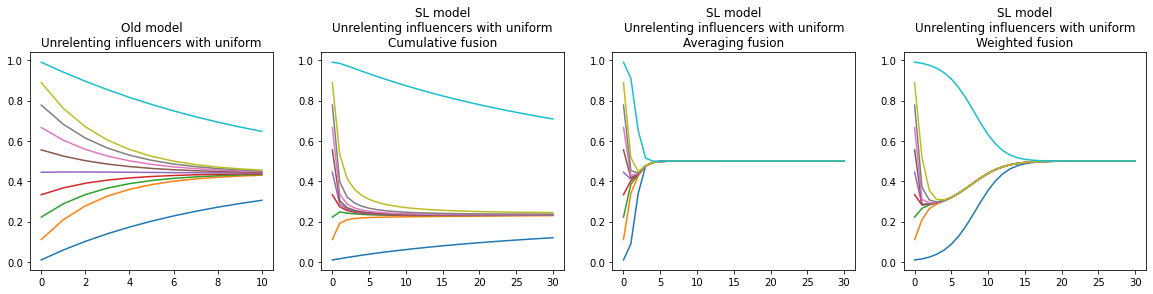

In [47]:
INFLUENCERS_OUTGOING_VALUE_FIRST = 0.8
INFLUENCERS_OUTGOING_VALUE_SECOND = 0.5
INFLUENCERS_INCOMING_VALUE_FIRST = 0.1
INFLUENCERS_INCOMING_VALUE_SECOND = 0.1
OTHERS_BELIEF_VALUE = 0.2
AKV_NUM_STEPS = 10
SL_STEPS = 30
NUM_AGENTS = 10

akv_model, sl_model_cumulative, sl_model_average, sl_model_weighted = simulate(AKVModel.InitialConfigurations.uniform(NUM_AGENTS), AKVModel.InfluenceGraphs.two_influencers_unbalanced(NUM_AGENTS, INFLUENCERS_OUTGOING_VALUE_FIRST, INFLUENCERS_OUTGOING_VALUE_SECOND, INFLUENCERS_INCOMING_VALUE_FIRST, INFLUENCERS_INCOMING_VALUE_SECOND, OTHERS_BELIEF_VALUE), AKV_NUM_STEPS, SL_STEPS)

fig, ax = plt.subplots(1, 4)
fig.set(figwidth=20)
for i in range(NUM_AGENTS):
    ax[0].plot(list(range(AKV_NUM_STEPS + 1)), [akv_model.states[j][i] for j in range(AKV_NUM_STEPS + 1)])
    ax[1].plot(list(range(SL_STEPS + 1)), [sl_model_cumulative.states[j][i].P[0] for j in range(SL_STEPS + 1)])
    ax[2].plot(list(range(SL_STEPS + 1)), [sl_model_average.states[j][i].P[0] for j in range(SL_STEPS + 1)])
    ax[3].plot(list(range(SL_STEPS + 1)), [sl_model_weighted.states[j][i].P[0] for j in range(SL_STEPS + 1)])

ax[0].set_title("Old model\nMalleable influencers with uniform")
ax[1].set_title("SL model\nMalleable influencers with uniform\nCumulative fusion")
ax[2].set_title("SL model\nMalleable influencers with uniform\nAveraging fusion")
ax[3].set_title("SL model\nMalleable influencers with uniform\nWeighted fusion")

Text(0.5, 1.0, 'SL model\nMalleable influencers with mildly\nWeighted fusion')

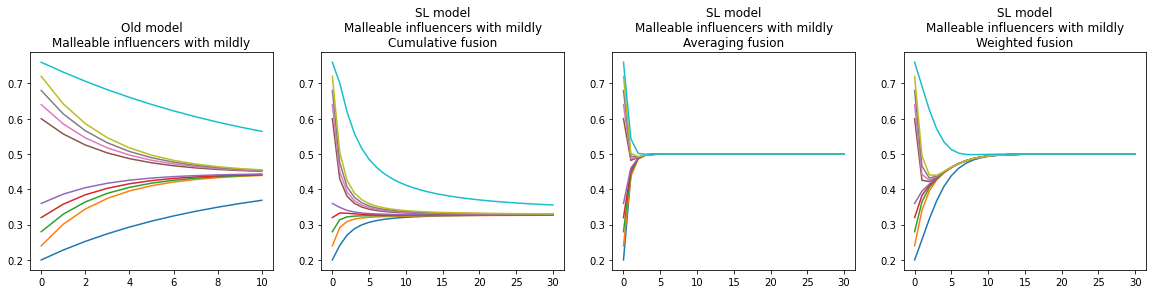

In [48]:
INFLUENCERS_OUTGOING_VALUE_FIRST = 0.8
INFLUENCERS_OUTGOING_VALUE_SECOND = 0.5
INFLUENCERS_INCOMING_VALUE_FIRST = 0.1
INFLUENCERS_INCOMING_VALUE_SECOND = 0.1
OTHERS_BELIEF_VALUE = 0.2
AKV_NUM_STEPS = 10
SL_STEPS = 30
NUM_AGENTS = 10

akv_model, sl_model_cumulative, sl_model_average, sl_model_weighted = simulate(AKVModel.InitialConfigurations.mildly(NUM_AGENTS), AKVModel.InfluenceGraphs.two_influencers_unbalanced(NUM_AGENTS, INFLUENCERS_OUTGOING_VALUE_FIRST, INFLUENCERS_OUTGOING_VALUE_SECOND, INFLUENCERS_INCOMING_VALUE_FIRST, INFLUENCERS_INCOMING_VALUE_SECOND, OTHERS_BELIEF_VALUE), AKV_NUM_STEPS, SL_STEPS)

fig, ax = plt.subplots(1, 4)
fig.set(figwidth=20)
for i in range(NUM_AGENTS):
    ax[0].plot(list(range(AKV_NUM_STEPS + 1)), [akv_model.states[j][i] for j in range(AKV_NUM_STEPS + 1)])
    ax[1].plot(list(range(SL_STEPS + 1)), [sl_model_cumulative.states[j][i].P[0] for j in range(SL_STEPS + 1)])
    ax[2].plot(list(range(SL_STEPS + 1)), [sl_model_average.states[j][i].P[0] for j in range(SL_STEPS + 1)])
    ax[3].plot(list(range(SL_STEPS + 1)), [sl_model_weighted.states[j][i].P[0] for j in range(SL_STEPS + 1)])

ax[0].set_title("Old model\nMalleable influencers with mildly")
ax[1].set_title("SL model\nMalleable influencers with mildly\nCumulative fusion")
ax[2].set_title("SL model\nMalleable influencers with mildly\nAveraging fusion")
ax[3].set_title("SL model\nMalleable influencers with mildly\nWeighted fusion")

Text(0.5, 1.0, 'SL model\nMalleable influencers with extreme\nWeighted fusion')

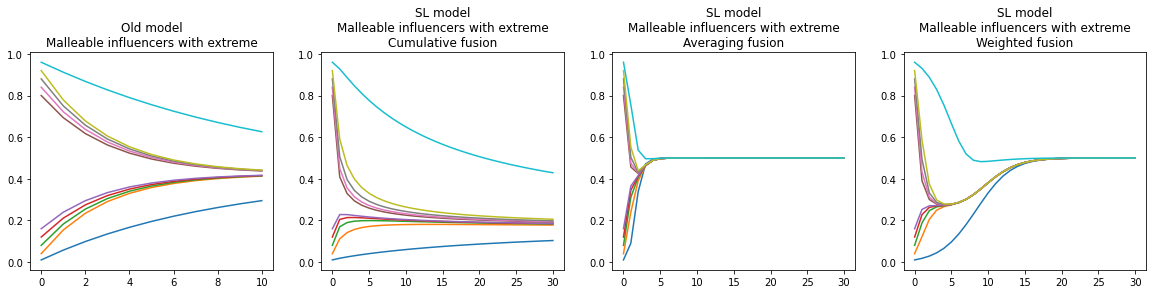

In [49]:
INFLUENCERS_OUTGOING_VALUE_FIRST = 0.8
INFLUENCERS_OUTGOING_VALUE_SECOND = 0.5
INFLUENCERS_INCOMING_VALUE_FIRST = 0.1
INFLUENCERS_INCOMING_VALUE_SECOND = 0.1
OTHERS_BELIEF_VALUE = 0.2
AKV_NUM_STEPS = 10
SL_STEPS = 30
NUM_AGENTS = 10

akv_model, sl_model_cumulative, sl_model_average, sl_model_weighted = simulate(AKVModel.InitialConfigurations.extreme(NUM_AGENTS), AKVModel.InfluenceGraphs.two_influencers_unbalanced(NUM_AGENTS, INFLUENCERS_OUTGOING_VALUE_FIRST, INFLUENCERS_OUTGOING_VALUE_SECOND, INFLUENCERS_INCOMING_VALUE_FIRST, INFLUENCERS_INCOMING_VALUE_SECOND, OTHERS_BELIEF_VALUE), AKV_NUM_STEPS, SL_STEPS)

fig, ax = plt.subplots(1, 4)
fig.set(figwidth=20)
for i in range(NUM_AGENTS):
    ax[0].plot(list(range(AKV_NUM_STEPS + 1)), [akv_model.states[j][i] for j in range(AKV_NUM_STEPS + 1)])
    ax[1].plot(list(range(SL_STEPS + 1)), [sl_model_cumulative.states[j][i].P[0] for j in range(SL_STEPS + 1)])
    ax[2].plot(list(range(SL_STEPS + 1)), [sl_model_average.states[j][i].P[0] for j in range(SL_STEPS + 1)])
    ax[3].plot(list(range(SL_STEPS + 1)), [sl_model_weighted.states[j][i].P[0] for j in range(SL_STEPS + 1)])

ax[0].set_title("Old model\nMalleable influencers with extreme")
ax[1].set_title("SL model\nMalleable influencers with extreme\nCumulative fusion")
ax[2].set_title("SL model\nMalleable influencers with extreme\nAveraging fusion")
ax[3].set_title("SL model\nMalleable influencers with extreme\nWeighted fusion")

Text(0.5, 1.0, 'SL model\nMalleable influencers with tripolar\nWeighted fusion')

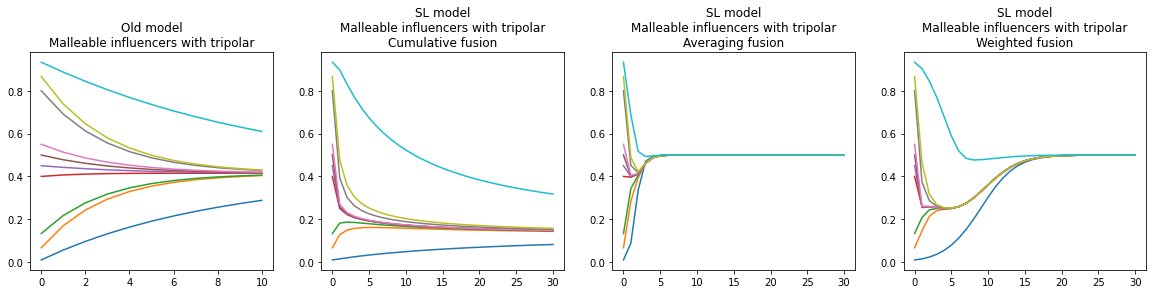

In [50]:
INFLUENCERS_OUTGOING_VALUE_FIRST = 0.8
INFLUENCERS_OUTGOING_VALUE_SECOND = 0.5
INFLUENCERS_INCOMING_VALUE_FIRST = 0.1
INFLUENCERS_INCOMING_VALUE_SECOND = 0.1
OTHERS_BELIEF_VALUE = 0.2
AKV_NUM_STEPS = 10
SL_STEPS = 30
NUM_AGENTS = 10

akv_model, sl_model_cumulative, sl_model_average, sl_model_weighted = simulate(AKVModel.InitialConfigurations.tripolar(NUM_AGENTS), AKVModel.InfluenceGraphs.two_influencers_unbalanced(NUM_AGENTS, INFLUENCERS_OUTGOING_VALUE_FIRST, INFLUENCERS_OUTGOING_VALUE_SECOND, INFLUENCERS_INCOMING_VALUE_FIRST, INFLUENCERS_INCOMING_VALUE_SECOND, OTHERS_BELIEF_VALUE), AKV_NUM_STEPS, SL_STEPS)

fig, ax = plt.subplots(1, 4)
fig.set(figwidth=20)
for i in range(NUM_AGENTS):
    ax[0].plot(list(range(AKV_NUM_STEPS + 1)), [akv_model.states[j][i] for j in range(AKV_NUM_STEPS + 1)])
    ax[1].plot(list(range(SL_STEPS + 1)), [sl_model_cumulative.states[j][i].P[0] for j in range(SL_STEPS + 1)])
    ax[2].plot(list(range(SL_STEPS + 1)), [sl_model_average.states[j][i].P[0] for j in range(SL_STEPS + 1)])
    ax[3].plot(list(range(SL_STEPS + 1)), [sl_model_weighted.states[j][i].P[0] for j in range(SL_STEPS + 1)])

ax[0].set_title("Old model\nMalleable influencers with tripolar")
ax[1].set_title("SL model\nMalleable influencers with tripolar\nCumulative fusion")
ax[2].set_title("SL model\nMalleable influencers with tripolar\nAveraging fusion")
ax[3].set_title("SL model\nMalleable influencers with tripolar\nWeighted fusion")